In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as matax
from calendar import monthrange
import PVCellDemandData as pvdd

In [22]:
C1_arcata = pd.read_csv("PVCellData/1_Arcata.csv", skiprows = 17)
C1_eureka = pd.read_csv("PVCellData/1_Eureka.csv", skiprows = 17)

C2_napa = pd.read_csv("PVCellData/2_Napa.csv", skiprows = 17)
C2_sanrafael = pd.read_csv("PVCellData/2_SanRafael.csv", skiprows = 17)

C3_oakland = pd.read_csv("PVCellData/3_Oakland.csv", skiprows = 17)
C3_redwoodcity = pd.read_csv("PVCellData/3_RedwoodCity.csv", skiprows = 17)
C3_sf = pd.read_csv("PVCellData/3_SF.csv", skiprows = 17)

C4_gilroy = pd.read_csv("PVCellData/4_Gilroy.csv", skiprows = 17)
C4_sanjose = pd.read_csv("PVCellData/4_SanJose.csv", skiprows = 17)
C4_sunnyvale = pd.read_csv("PVCellData/4_Sunnyvale.csv", skiprows = 17)

C5_santamaria = pd.read_csv("PVCellData/5_SantaMaria.csv", skiprows = 17)
C5_slo = pd.read_csv("PVCellData/5_SLO.csv", skiprows = 17)

C6_longbeach = pd.read_csv("PVCellData/6_LongBeach.csv", skiprows = 17)
C6_santabarbara = pd.read_csv("PVCellData/6_SantaBarbara.csv", skiprows = 17)

C7_oceanside = pd.read_csv("PVCellData/7_Oceanside.csv", skiprows = 17)
C7_sandiego = pd.read_csv("PVCellData/7_SanDiego.csv", skiprows = 17)

C8_anaheim = pd.read_csv("PVCellData/8_Anaheim.csv", skiprows = 17)
C8_tustin = pd.read_csv("PVCellData/8_Tustin.csv", skiprows = 17)

C9_la = pd.read_csv("PVCellData/9_LA.csv", skiprows = 17)
C9_pasadena = pd.read_csv("PVCellData/9_Pasadena.csv", skiprows = 17)

C10_riverside = pd.read_csv("PVCellData/10_Riverside.csv", skiprows = 17)
C10_sanbernardino = pd.read_csv("PVCellData/10_SanBernardino.csv", skiprows = 17)

C11_marysville = pd.read_csv("PVCellData/11_Marysville.csv", skiprows = 17)
C11_redbluff = pd.read_csv("PVCellData/11_RedBluff.csv", skiprows = 17)

C12_merced = pd.read_csv("PVCellData/12_Merced.csv", skiprows = 17)
C12_stockton = pd.read_csv("PVCellData/12_Stockton.csv", skiprows = 17)

C13_bakersfield = pd.read_csv("PVCellData/13_Bakersfield.csv", skiprows = 17)
C13_fresno = pd.read_csv("PVCellData/13_Fresno.csv", skiprows = 17)

C14_29palms = pd.read_csv("PVCellData/14_29Palms.csv", skiprows = 17)
C14_barstow = pd.read_csv("PVCellData/14_Barstow.csv", skiprows = 17)

C15_blythe = pd.read_csv("PVCellData/15_Blythe.csv", skiprows = 17)
C15_needles = pd.read_csv("PVCellData/15_Needles.csv", skiprows = 17)

C16_bishop = pd.read_csv("PVCellData/16_Bishop.csv", skiprows = 17)
C16_mtshasta = pd.read_csv("PVCellData/16_Mtshasta.csv", skiprows = 17)

In [23]:
ER_WH_Raw = pd.read_csv("LoadHourlyProfileData/ER_WH_HourlyProfiles.csv", usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
HP_WH_Raw = pd.read_csv("LoadHourlyProfileData/HP_WH_HourlyProfiles.csv", usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
HP_SH_Raw = pd.read_csv("LoadHourlyProfileData/HP_SH_HourlyProfiles.csv", usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [24]:
C1_ER_WH = ER_WH_Raw.loc[:, '1'].to_frame()
C1_HP_WH = HP_WH_Raw.loc[:, '1'].to_frame()

In [25]:
def hours_in_month(month, year):
    return monthrange(year, month)[1] * 24

In [26]:
def hour_bounds_by_month(month, year):
    lower_bound = 0
    for i in range(1, month):
        lower_bound += hours_in_month(i, year)
    upper_bound = lower_bound + hours_in_month(month, year) - 1
    return (lower_bound, upper_bound)

hour_bounds_by_month(1, 2019)

(0, 743)

In [27]:
temp = HP_SH_Raw.loc[0:743, '1'].to_frame()

In [28]:
# find average ER_WH, HP_WH, and HP_SH per month per hour for each climate zone.
def average_ER_WH(month, year, climate):  # pass in month and climate as integers
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 24
    
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    climate_ER_WH = ER_WH_Raw.loc[first_hour_of_month:last_hour_of_month, str(climate)].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in climate_ER_WH.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_ER_WH(1, 2019, 1)

array([0.06835961, 0.        , 0.        , 0.13087252, 0.26772339,
       0.15521184, 0.05297329, 0.61936442, 0.98947394, 0.86205077,
       0.81120645, 0.22747687, 0.19394523, 0.2142181 , 0.12579306,
       0.22832619, 0.23467742, 0.50990032, 0.63488158, 0.49488677,
       0.8008559 , 0.52125616, 0.20737   , 0.        ])

In [29]:
def average_HP_WH(month, year, climate):  # pass in month and climate as integers
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 24
    
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    climate_HP_WH = HP_WH_Raw.loc[first_hour_of_month:last_hour_of_month, str(climate)].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in climate_HP_WH.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_HP_WH(1, 2019, 1)

array([0.07867739, 0.06948677, 0.05053794, 0.10604677, 0.03019768,
       0.05452084, 0.23014384, 0.223172  , 0.15429665, 0.44456319,
       0.37526152, 0.28799242, 0.31655329, 0.31865645, 0.10839439,
       0.10563061, 0.11229197, 0.19366677, 0.10556426, 0.23730123,
       0.40998323, 0.18110742, 0.20123716, 0.14398326])

In [30]:
def average_HP_SH(month, year, climate):  # pass in month and climate as integers
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 24
    
    # first_hour and last_hour are the bounds to pass into HP_SH_Raw to get the hours corresponding to the right month
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    climate_HP_SH = HP_SH_Raw.loc[first_hour_of_month:last_hour_of_month, str(climate)].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in climate_HP_SH.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_HP_SH(2, 2019, 1)

array([0.37135123, 0.41125025, 0.42681956, 0.48454521, 0.52514018,
       0.51801013, 0.5201386 , 0.43740844, 0.3289824 , 0.25933457,
       0.19706829, 0.16692845, 0.13671516, 0.10985004, 0.11049291,
       0.12602206, 0.1384783 , 0.15169843, 0.15706711, 0.17115095,
       0.18374331, 0.21408578, 0.27269639, 0.33754337])

In [31]:
def cumulative_average_SH_and_WH(month, year, climate):
    HP_WH_values = average_HP_WH(month, year, climate)
    HP_SH_values = average_HP_SH(month, year, climate)
    
    return np.sum([HP_SH_values, HP_WH_values], axis=0)

cumulative_average_SH_and_WH(1, 2019, 1)

array([0.5718686 , 0.60998068, 0.63078168, 0.73459069, 0.66602822,
       0.67418271, 0.82654915, 0.73063843, 0.522567  , 0.73100604,
       0.59805023, 0.45558101, 0.43673304, 0.42034681, 0.20546859,
       0.20964037, 0.22969296, 0.33575179, 0.2746617 , 0.43894598,
       0.65261445, 0.47441932, 0.5498979 , 0.56044238])

In [99]:
climateDict = {
    1 : [C1_arcata, C1_eureka],
    2 : [C2_napa, C2_sanrafael],
    3 : [C3_oakland, C3_sf],
    4 : [C4_gilroy, C4_sanjose],
    5 : [C5_santamaria, C5_slo],
    6 : [C6_longbeach, C6_santabarbara],
    7 : [C7_oceanside, C7_sandiego],
    8 : [C8_anaheim, C8_tustin],
    9 : [C9_la, C9_pasadena],
    10 : [C10_riverside, C10_sanbernardino],
    11 : [C11_marysville, C11_redbluff],
    12 : [C12_merced, C12_stockton],
    13 : [C13_bakersfield, C13_fresno],
    14 : [C14_29palms, C14_barstow],
    15 : [C15_blythe, C15_needles],
    16 : [C16_bishop, C16_mtshasta]
}

In [33]:
def days_in_month(month, year=2019):
    return monthrange(year, month)[1]


In [34]:
def averageHourlyKWInMonth(climate, month):
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 12
    hourlyDict = {}
    cities = climateDict.get(climate)
    days = days_in_month(month)
    for city in cities:
        monthTable = city[city['Month'] == str(month)]
        for hour in range(24):
            sumKWH = monthTable[monthTable['Hour'] == str(hour)]['AC System Output (W)'].sum() / 1000
            averageKWH = sumKWH / days
            hourlyDict[hour] = averageKWH
    return hourlyDict

averageHourlyKWInMonth(1, 1)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0734671935483871,
 9: 0.19343780645161288,
 10: 0.27767309677419355,
 11: 0.36063709677419353,
 12: 0.35705512903225795,
 13: 0.3348732903225807,
 14: 0.2503541935483871,
 15: 0.16319790322580643,
 16: 0.058331290322580644,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0}

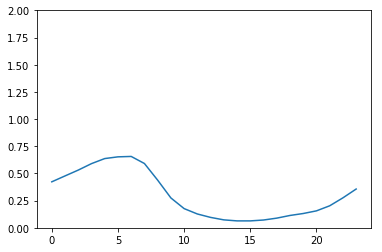

In [35]:
temp = average_HP_SH(2, 2019, 2)  # month, year, climate
plt.ylim(0, 2)  
plt.plot(temp)

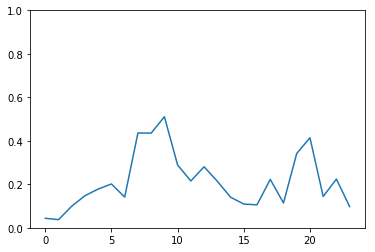

In [36]:
temp = average_HP_WH(1, 2019, 14)  # month, year, climate
plt.ylim(0, 1)  
plt.plot(temp)

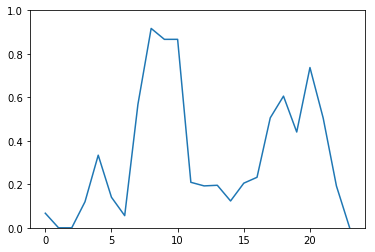

In [37]:
temp = average_ER_WH(1, 2019, 14)  # month, year, climate
plt.ylim(0, 1)   
plt.plot(temp)

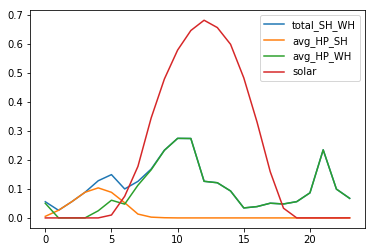

In [45]:
climate_var = 3
month_var = 7

hourDict = averageHourlyKWInMonth(climate_var, month_var)   # climate, month
hourDictKeys = sorted(hourDict.items())
x, y = zip(*hourDictKeys)

total_SH_WH = cumulative_average_SH_and_WH(month_var, 2019, climate_var)  # month, year, climate

avg_HP_SH = average_HP_SH(month_var, 2019, climate_var)  # month, year, climate
avg_HP_WH = average_HP_WH(month_var, 2019, climate_var)

plt.plot(total_SH_WH, label = "total_SH_WH")
plt.plot(avg_HP_SH, label = "avg_HP_SH")
plt.plot(avg_HP_WH, label = "avg_HP_WH")
plt.plot(x, y, label = "solar")
plt.legend()
plt.show()


In [53]:
# obtaining the total - poolpump values
#pge_0_1_raw 
#pge_1_2_raw
#pge_2_3_raw
#pge_3_4_raw
#pge_0_1_raw
pge_5_6_raw = pd.read_csv("AnonymizedData/pge-res-PGFG-res_misc-noKW-nonCare-0.5_0.6.csv")
pge_5_6_raw
pge_5_6_raw['total_minus_poolpump'] = (pge_5_6_raw['total'] - pge_5_6_raw['poolpump']) / 15142
pge_5_6_raw

,hour_ending,cooling,poolpump,plugload,other,total,total_minus_poolpump
0,1.0,0.0,124.012980,2900.982491,6768.959146,9793.954617,0.638617
1,2.0,0.0,95.394600,2878.756908,6717.099452,9691.250960,0.633724
2,3.0,0.0,120.197196,2878.922240,6717.485227,9716.604663,0.633761
3,4.0,0.0,137.368224,2475.200334,5775.467446,8388.036004,0.544886
4,5.0,0.0,135.460332,2043.880644,4769.054836,6948.395812,0.449936
5,6.0,0.0,181.249740,2261.905136,5277.778651,7720.933528,0.497932
6,7.0,0.0,333.881100,2648.036641,6178.752162,9160.669902,0.582934
7,8.0,0.0,436.907268,3168.571829,7393.334267,10998.813364,0.697524
8,9.0,0.0,534.209760,3409.559604,7955.639076,11899.408440,0.750574
9,10.0,0.0,734.538420,4005.121614,9345.283766,14084.943800,0.881680


In [54]:
def average_anonymous_5_6(month, year, ):  # pass in month as integer
    assert month >= 1 and month <= 24
    
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    pge_5_6 = pge_5_6_raw.loc[first_hour_of_month:last_hour_of_month, 'total_minus_poolpump'].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in pge_5_6.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_anonymous_5_6(1, 2019)

array([0.48760085, 0.47155435, 0.46716358, 0.44072116, 0.43428657,
       0.50302391, 0.6310435 , 0.77926287, 0.75892035, 0.73532006,
       0.68591408, 0.66749841, 0.61485871, 0.6025734 , 0.56731018,
       0.5978062 , 0.70332058, 1.02051554, 1.0781846 , 1.0217242 ,
       0.97033449, 0.88523548, 0.71234406, 0.57865153])

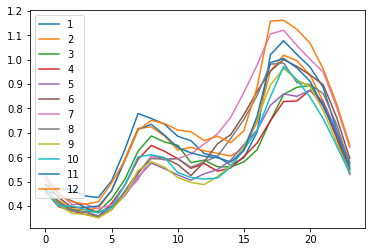

In [56]:
for i in range(12): 
    plt.plot(average_anonymous_5_6(i+1, 2019), label = str(i+1))
plt.legend()
plt.show()

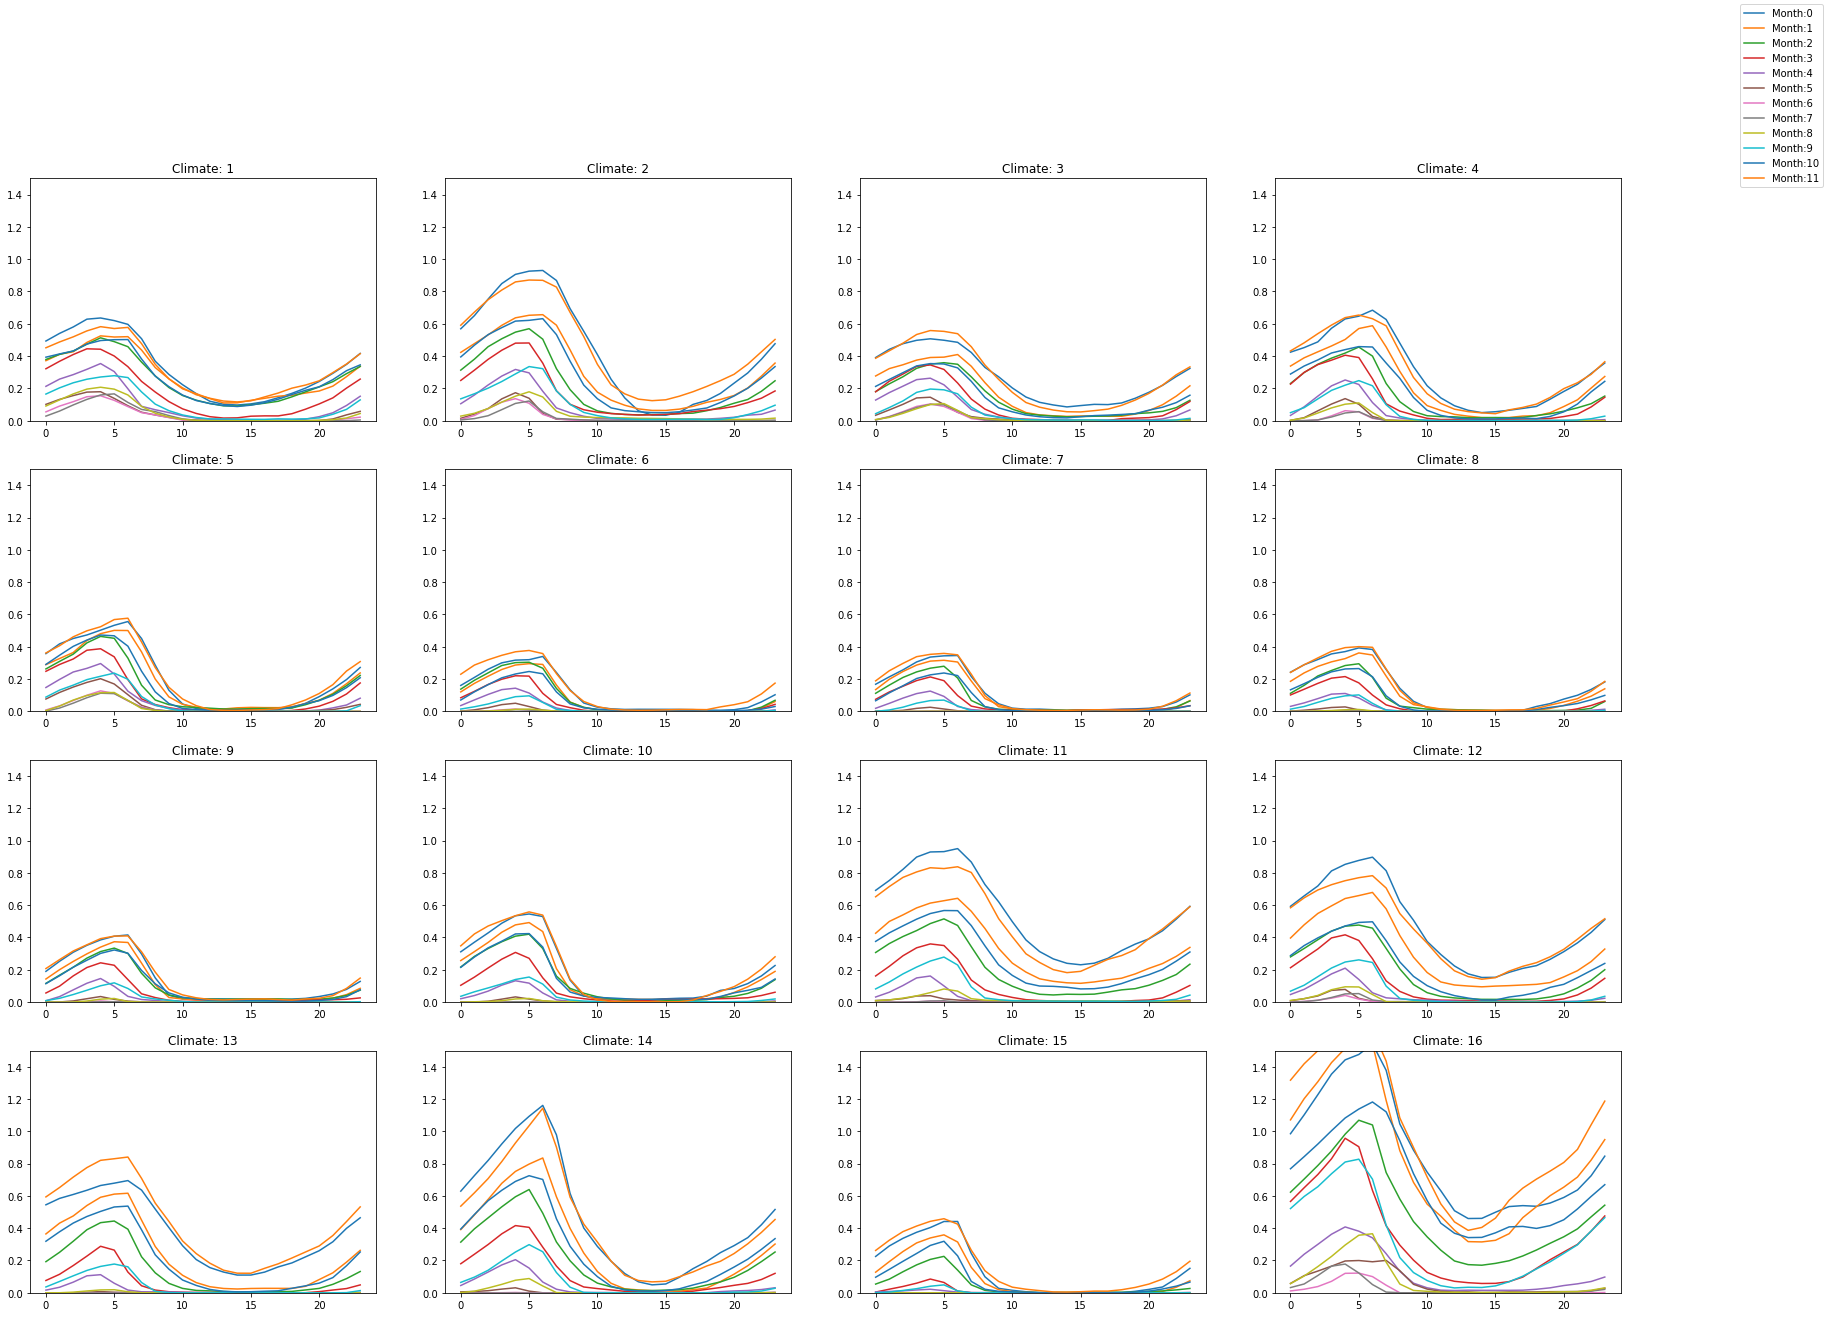

In [115]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(28.5, 20.5)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.set_ylim(0, 1.5)
    for j in range(12):
        houraveragebymonthclimate = average_HP_SH(j+1, 2019, i+1)
        plt.title("Climate: " + str(i+1))
        if i == 1:
            ax.plot(x, houraveragebymonthclimate, label = "Month:" + str(j))
        else:
            ax.plot(x, houraveragebymonthclimate)
            
legend = fig.legend()

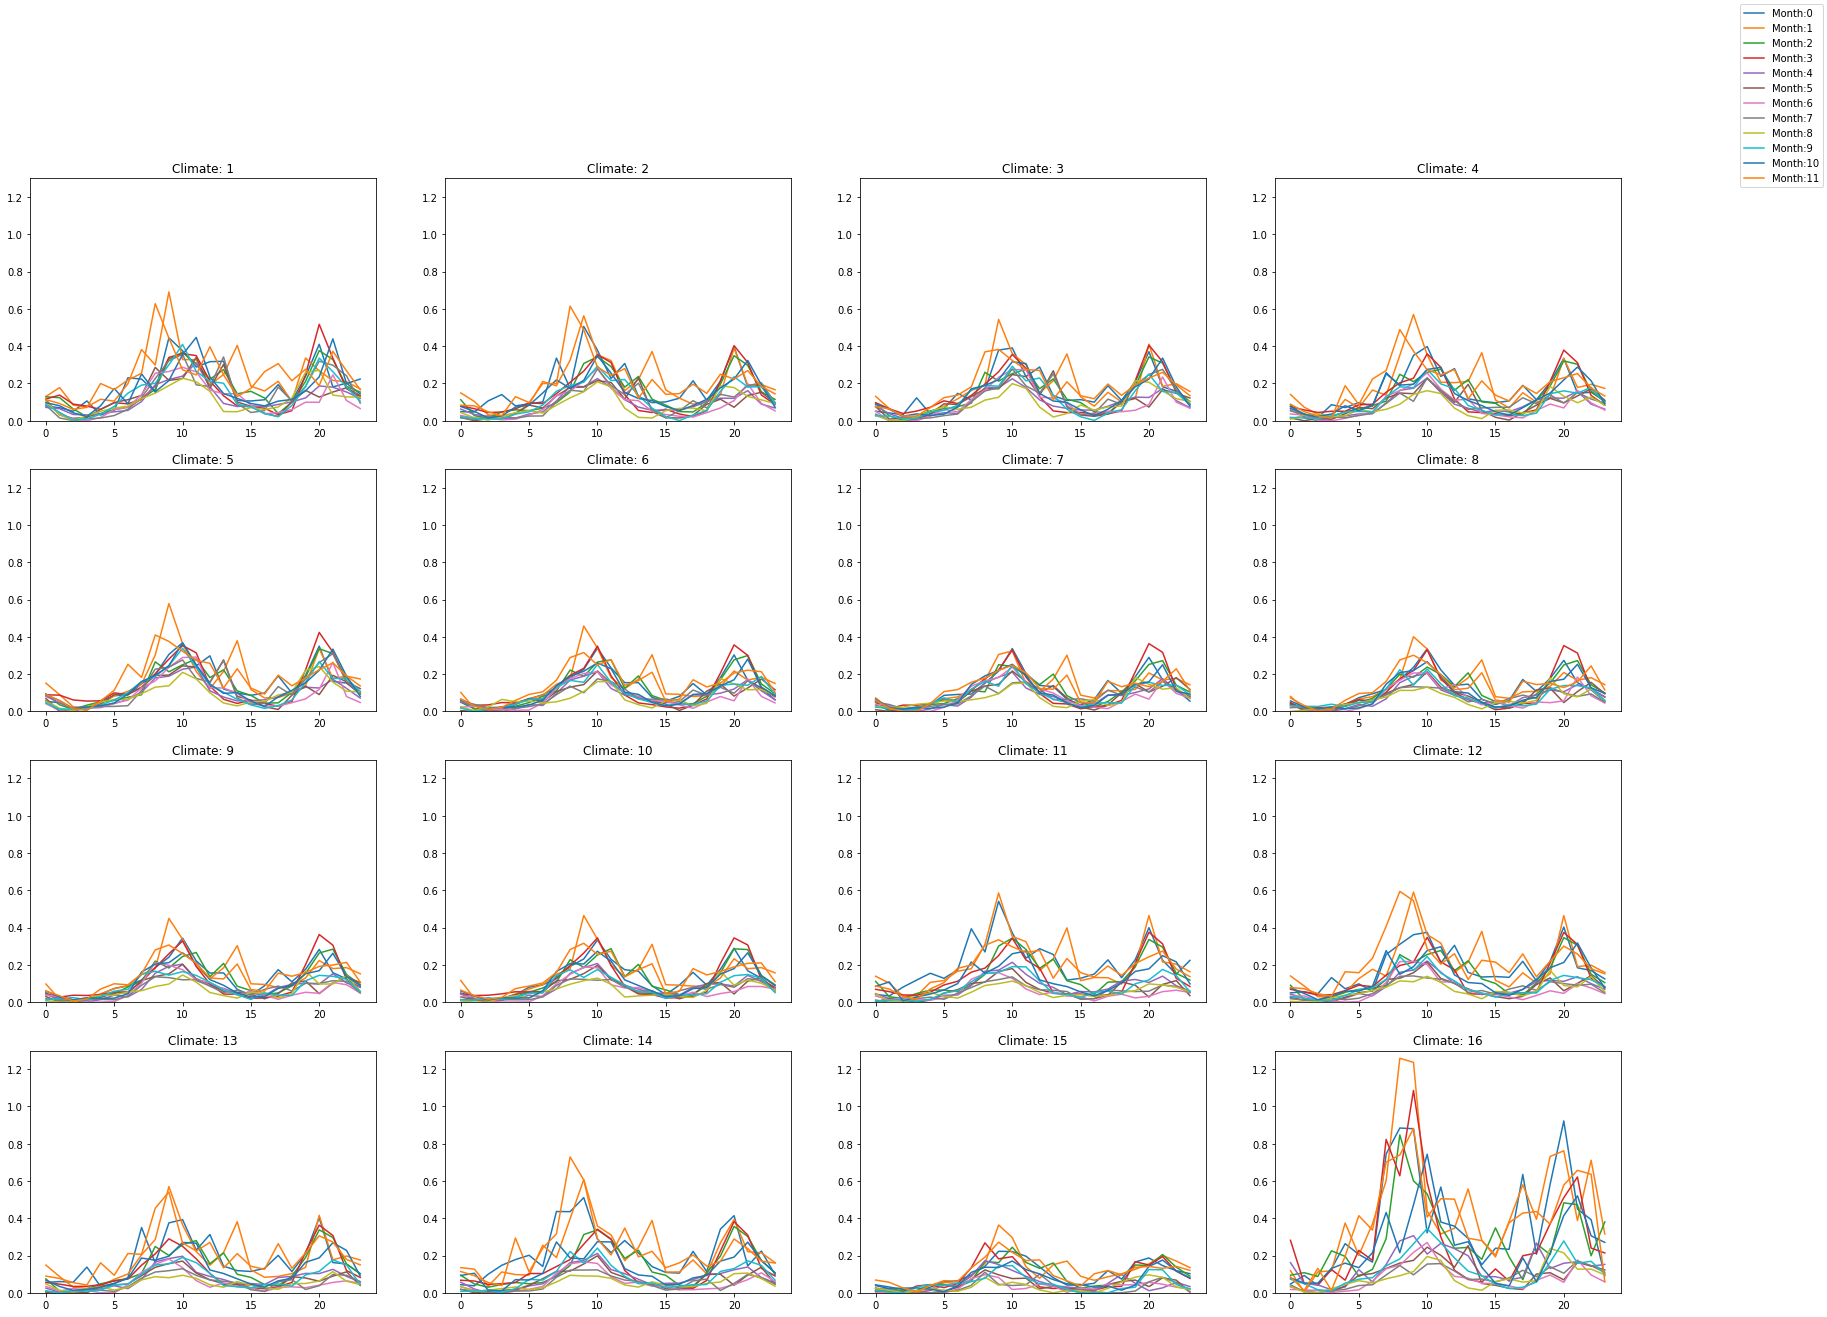

In [116]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(28.5, 20.5)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.set_ylim(0, 1.3)
    for j in range(12):
        houraveragebymonthclimate = average_HP_WH(j+1, 2019, i+1)
        plt.title("Climate: " + str(i+1))
        if i == 1:
            ax.plot(x, houraveragebymonthclimate, label = "Month:" + str(j))
        else:
            ax.plot(x, houraveragebymonthclimate)
            
legend = fig.legend()

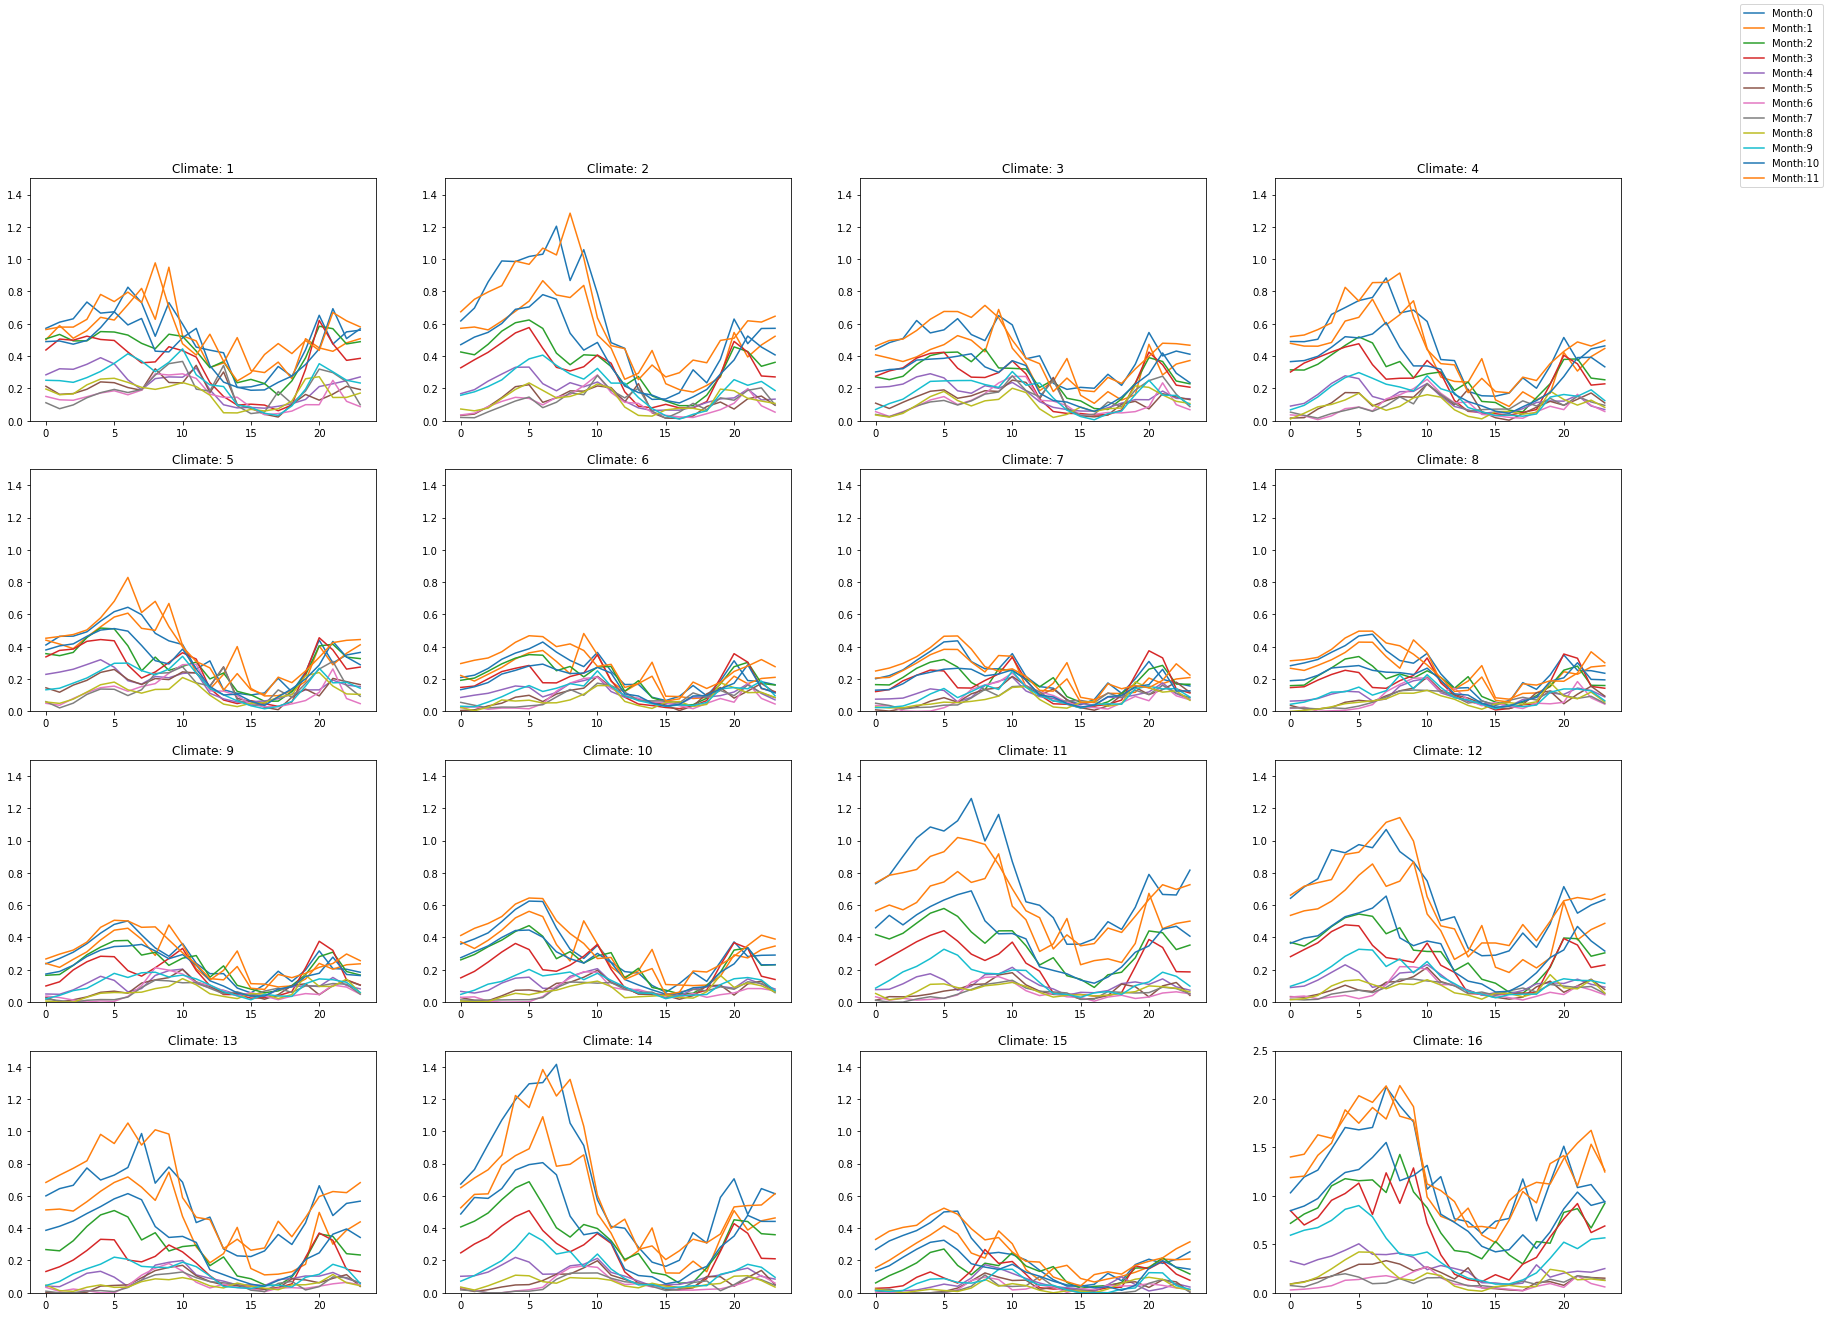

In [120]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(28.5, 20.5)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    for j in range(12):
        houraveragebymonthclimate = cumulative_average_SH_and_WH(j+1, 2019, i+1)
        plt.title("Climate: " + str(i+1))
        if i == 15:
            ax.set_ylim(0, 2.5)
            ax.plot(x, houraveragebymonthclimate, label = "Month:" + str(j))
        else:
            ax.set_ylim(0, 1.5)
            ax.plot(x, houraveragebymonthclimate)
            
legend = fig.legend()

In [66]:
def average_PV(month, year, climate):
    hourMap = pvdd.averageHourlyKWInMonth(climate, month)
    kW_list = np.zeros(24)
    for hour in range(24):
        kW_list[hour] = hourMap[hour]
    return kW_list

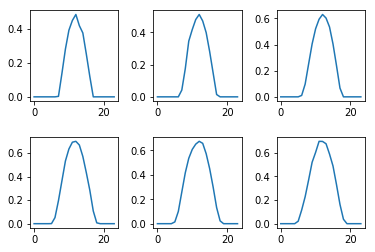

In [67]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    dayAveragePerMonth = average_PV(i, 2019, 3)
    ax.plot(x, dayAveragePerMonth)
